In [32]:
import numpy as np
import pandas as pd 
import os.path
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection, svm, metrics
from sklearn.calibration import calibration_curve, CalibrationDisplay
import matplotlib.pyplot as plt
import tensorflow_probability as tfp

# Screening Dataset Logistic Regression

In [28]:
data_path = os.path.join("..", "data", "screening", "screening_data.csv")
data = pd.read_csv(data_path)
training_variables = ['satisfactoryCreditHistory',
       'applicantIncomeLog', 'coapplicantIncomeLog', 'loanAmountLog',
       'loanAmountTermLog', 'totalIncomeLog', 'isMarried',
       'has1Dependent', 'has2Dependents', 'has3+Dependents', 'hasNotGraduated',
       'isSelfEmployed', 'livesSemiurbal', 'livesUrban']


In [36]:
data.columns

Index(['loanID', 'applicantIncome', 'coapplicantIncome', 'loanAmount',
       'loanAmountTerm', 'satisfactoryCreditHistory', 'totalIncome',
       'applicantIncomeLog', 'coapplicantIncomeLog', 'loanAmountLog',
       'loanAmountTermLog', 'totalIncomeLog', 'isMale', 'isMarried',
       'has1Dependent', 'has2Dependents', 'has3+Dependents', 'hasNotGraduated',
       'isSelfEmployed', 'livesSemiurbal', 'livesUrban', 'outcome'],
      dtype='object')

In [35]:
data

,loanID,applicantIncome,coapplicantIncome,loanAmount,loanAmountTerm,satisfactoryCreditHistory,totalIncome,applicantIncomeLog,coapplicantIncomeLog,loanAmountLog,...,isMale,isMarried,has1Dependent,has2Dependents,has3+Dependents,hasNotGraduated,isSelfEmployed,livesSemiurbal,livesUrban,outcome
0,LP001002,5849,0.0,142.51153,360.0,1.00000,5849.0,8.674026,-2.302585,4.959423,...,1,0,0,0,0,0,0,0,1,1
1,LP001003,4583,1508.0,128.00000,360.0,1.00000,6091.0,8.430109,7.318540,4.852030,...,1,1,1,0,0,0,0,0,0,0
2,LP001005,3000,0.0,66.00000,360.0,1.00000,3000.0,8.006368,-2.302585,4.189655,...,1,1,0,0,0,0,1,0,1,1
3,LP001006,2583,2358.0,120.00000,360.0,1.00000,4941.0,7.856707,7.765569,4.787492,...,1,1,0,0,0,1,0,0,1,1
4,LP001008,6000,0.0,141.00000,360.0,1.00000,6000.0,8.699515,-2.302585,4.948760,...,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,4009,1777.0,113.00000,360.0,1.00000,5786.0,8.296297,7.482682,4.727388,...,1,1,0,0,1,1,1,0,1,0
977,LP002975,4158,709.0,115.00000,360.0,1.00000,4867.0,8.332789,6.563856,4.744932,...,1,1,0,0,0,0,0,0,1,0
978,LP002980,3250,1993.0,126.00000,360.0,0.83592,5243.0,8.086410,7.597396,4.836282,...,1,0,0,0,0,0,0,1,0,0
979,LP002986,5000,2393.0,158.00000,360.0,1.00000,7393.0,8.517193,7.780303,5.062595,...,1,1,0,0,0,0,0,0,0,0


In [29]:
X = data[training_variables]
y = data["outcome"]

In [41]:
def classify(model,x,y):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(x,y, test_size=0.25, random_state=47)
    model.fit(X_train, y_train)
    print('Model',model)
    print("Accuracy is", model.score(X_test, y_test)* 100)
    # cross  validation for better validation
    kfold = model_selection.KFold(n_splits=10,random_state=42, shuffle=True)
    score = model_selection.cross_val_score(model, x, y, cv=kfold)
    print("Cross Val", np.mean(score)*100)
#     ROC curve + AUC
    train_roc = metrics.plot_roc_curve(model, X_train, y_train)
    test_roc = metrics.plot_roc_curve(model, X_test, y_test) 
    plt.show()
    y_prob = model.predict_proba(X_test)[:, 1]
    prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)
    disp = CalibrationDisplay(prob_true, prob_pred, y_prob)
    disp = CalibrationDisplay(prob_true, prob_pred, y_prob)
    disp.plot()
    
    y_prob = model.predict_proba(X_train)[:, 1]
    prob_true, prob_pred = calibration_curve(y_train, y_prob, n_bins=10)
    disp = CalibrationDisplay(prob_true, prob_pred, y_prob)
    disp = CalibrationDisplay(prob_true, prob_pred, y_prob)
    disp.plot()

/Users/mizukikadowaki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/mizukikadowaki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/sta

Model LogisticRegression()
Accuracy is 56.09756097560976
Cross Val 60.851370851370845


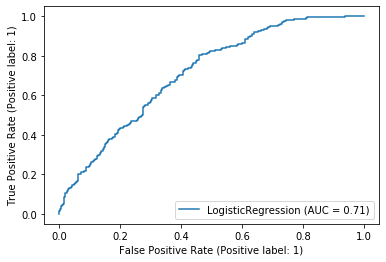

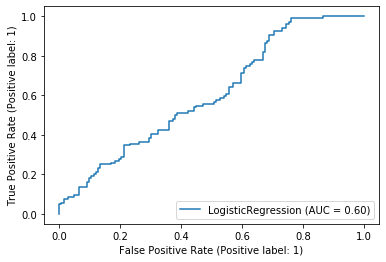

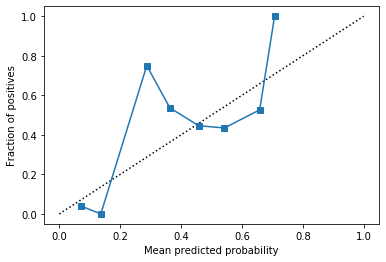

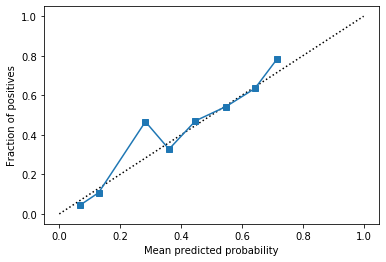

In [42]:
classify(LogisticRegression(), X, y)